# UCS2612 Machine Learning Lab

## ASSIGNMENT 1: Working with Python Packages - Numpy, Scipy, Scikit-Learn & MatPlotLib

### Name: Jahnavi Murali
### Reg. No.: 3122 21 5001 038
### Sem & Section: 6-'A'

## Import necessary Python libraries & functions

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the IRIS Dataset

Iris is a a small classic dataset from Fisher, 1936, used for evaluating classification methods. It contains information about the characteristics of three different species of iris flowers: Setosa, Versicolor, and Virginica. The dataset consists of 150 samples, with each sample representing a different iris flower. For each sample, four features are measured: sepal length, sepal width, petal length, and petal width

In [5]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('iris.data', names=cols)
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Pre-Processing the data


In [6]:
# Observing trends in the features of the Iris Dataset, to apply normalization

# Calculate range and standard deviation for each feature
range_features = iris.iloc[:, :-1].apply(lambda x: (x.min(), x.max()))
std_dev_features = iris.iloc[:, :-1].apply(lambda x: x.std())

# Display the results
print("Range for each feature:")
print(range_features)
print("\nStandard Deviation for each feature:")
print(std_dev_features)

# Sinces features appear to be on a similar scale/range, normalization is not necessary

Range for each feature:
   sepal_length  sepal_width  petal_length  petal_width
0           4.3          2.0           1.0          0.1
1           7.9          4.4           6.9          2.5

Standard Deviation for each feature:
sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64


In [8]:
# Standardization: Scale each feature to have a mean of 0 and a standard deviation of 1.

scaler = StandardScaler()
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [10]:
# Encoding Categorical Variables 
# The three classes: Setosa, Versicolor and Virginica encoded with labels 0,1 and 2 respectively

label_encoder = LabelEncoder()

iris['class_encoded'] = label_encoder.fit_transform(iris['class'])

class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Encoded classes:")
print(class_mapping)


Encoded classes:
{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [11]:
# Data after applying preprocessing techniques
iris

,sepal_length,sepal_width,petal_length,petal_width,class,class_encoded
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa,0
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa,0
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa,0
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa,0
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa,0
...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica,2
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica,2
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica,2
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica,2


## Exploratory Data Analysis and Visualization

In [16]:
# Summary statistics
iris_df = iris.drop('class_encoded', axis=1)
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,4.736952e-17,-2.368476e-17,4.736952e-17,4.736952e-17
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


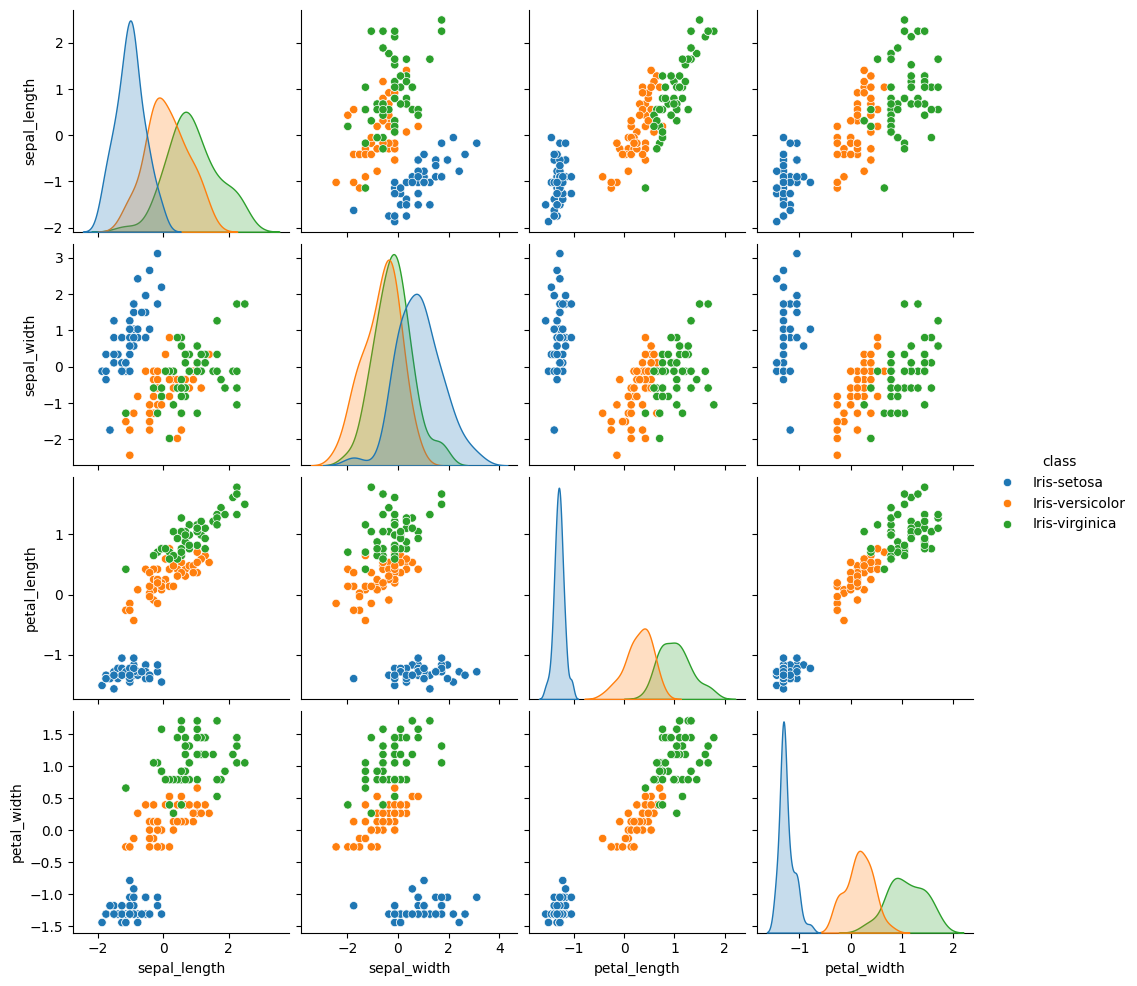

In [15]:
# Pair-Plot to understand relationship between different features
sns.pairplot(iris_df, hue='class')
plt.show()

## Feature Selection Techniques

In [18]:
# Using SelectKBest with f_classif for feature selection
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['class_encoded']
best_features = SelectKBest(score_func=f_classif, k=2)
X_new = best_features.fit_transform(X, y)

# Display selected features
print("Selected Features:", X.columns[best_features.get_support()])

Selected Features: Index(['petal_length', 'petal_width'], dtype='object')


## Split into Train, Test and Validation Sets in the ratio 8:1:1

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (120, 4) (120,)
Testing set shape: (15, 4) (15,)
Validation set shape: (15, 4) (15,)
